In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
import plotly.graph_objects as go
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import tree

In [ ]:
red_url = 'https://raw.githubusercontent.com/PinkWink/forML_study_data/main/data/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/forML_study_data/main/data/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

In [ ]:
red_wine['color']=1.
white_wine['color']=0.
wine = pd.concat([red_wine, white_wine])
wine.info()


In [ ]:
fig = px.histogram(wine, x='quality', color='color')
fig.show()

In [ ]:
x = wine.drop(['color'], axis=1)
y = wine['color']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

fig = go.Figure()
fig.add_trace(go.Histogram(x=x_train['quality'], name='train'))
fig.add_trace(go.Histogram(x=x_test['quality'], name='test'))

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.75)
fig.show()

In [35]:
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=5)
wine_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=5)

In [22]:
y_pred_tr = wine_tree.predict(x_train)
y_pred_test = wine_tree.predict(x_test)
print('Train Acc    : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc     : ', accuracy_score(y_test, y_pred_test))

Train Acc    :  0.9545891860688859
Test Acc     :  0.9592307692307692


In [37]:
MMS = MinMaxScaler()
SS = StandardScaler()
MMS.fit(x)
SS.fit(x)
x_mms = MMS.transform(x)
x_ss = SS.transform(x)
x_mms_pd = pd.DataFrame(x_mms, columns=x.columns)
x_ss_pd = pd.DataFrame(x_ss, columns=x.columns)

In [38]:
fig = go.Figure()
fig.add_trace(go.Box(y=x_mms_pd['fixed acidity'], name= 'fixed acidity'))
fig.add_trace(go.Box(y=x_mms_pd['chlorides'], name= 'chlorides'))
fig.add_trace(go.Box(y=x_mms_pd['quality'], name= 'quality'))
fig.show()

In [39]:
fig = go.Figure()
fig.add_trace(go.Box(y=x_ss_pd['fixed acidity'], name= 'fixed acidity'))
fig.add_trace(go.Box(y=x_ss_pd['chlorides'], name= 'chlorides'))
fig.add_trace(go.Box(y=x_ss_pd['quality'], name= 'quality'))
fig.show()

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x_mms_pd, y, test_size=0.2, random_state=5)
wine_tree = DecisionTreeClassifier(max_depth=4, random_state=5)
wine_tree.fit(x_train, y_train)
y_pred_tr = wine_tree.predict(x_train)
y_pred_test = wine_tree.predict(x_test)
print('Train Acc    : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc     : ', accuracy_score(y_test, y_pred_test))

Train Acc    :  0.9876852030017318
Test Acc     :  0.9830769230769231


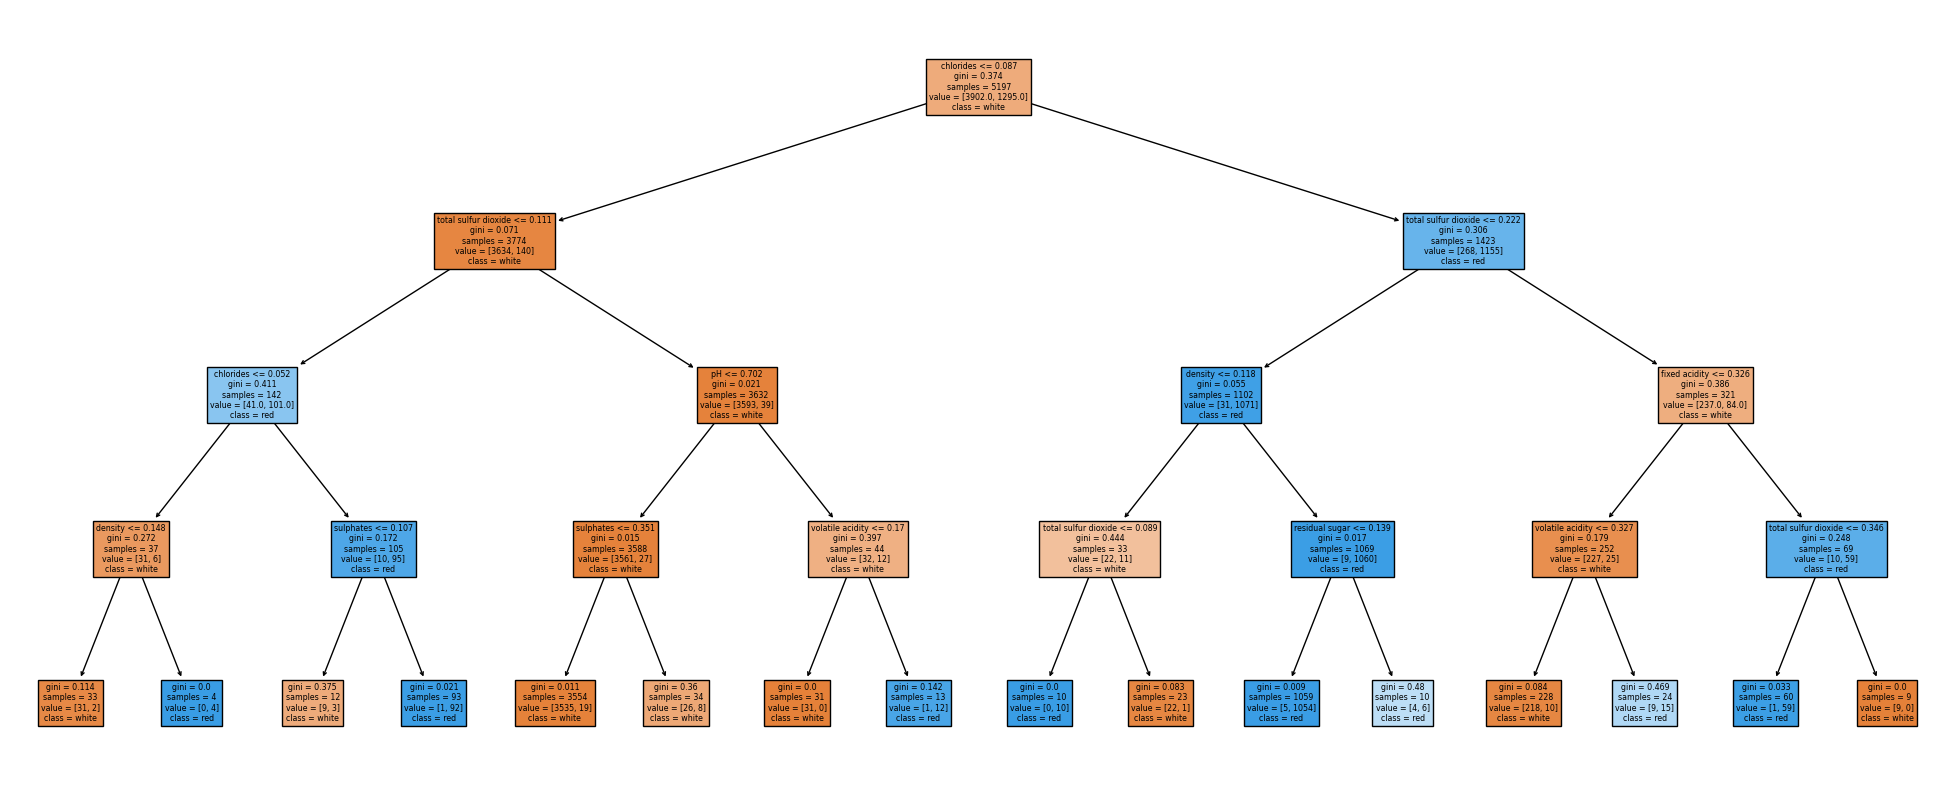

In [51]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(wine_tree, feature_names=x_train.columns, class_names =['white', 'red'], filled=True)

In [52]:
dict(zip(x_train.columns, wine_tree.feature_importances_))

{'fixed acidity': 0.03375855253984491,
 'volatile acidity': 0.01651229555240304,
 'citric acid': 0.0,
 'residual sugar': 0.0016883957410904784,
 'chlorides': 0.6927341015187559,
 'free sulfur dioxide': 0.0,
 'total sulfur dioxide': 0.22512950568623,
 'density': 0.018564103400923463,
 'pH': 0.0033347474228099805,
 'sulphates': 0.008278298137942182,
 'alcohol': 0.0,
 'quality': 0.0}

In [53]:
wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]
x = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
wine_tree = DecisionTreeClassifier(max_depth=4, random_state=5)
wine_tree.fit(x_train, y_train)
y_pred_tr = wine_tree.predict(x_train)
y_pred_test = wine_tree.predict(x_test)
print('Train Acc    : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc     : ', accuracy_score(y_test, y_pred_test))

Train Acc    :  0.7467769867231094
Test Acc     :  0.73


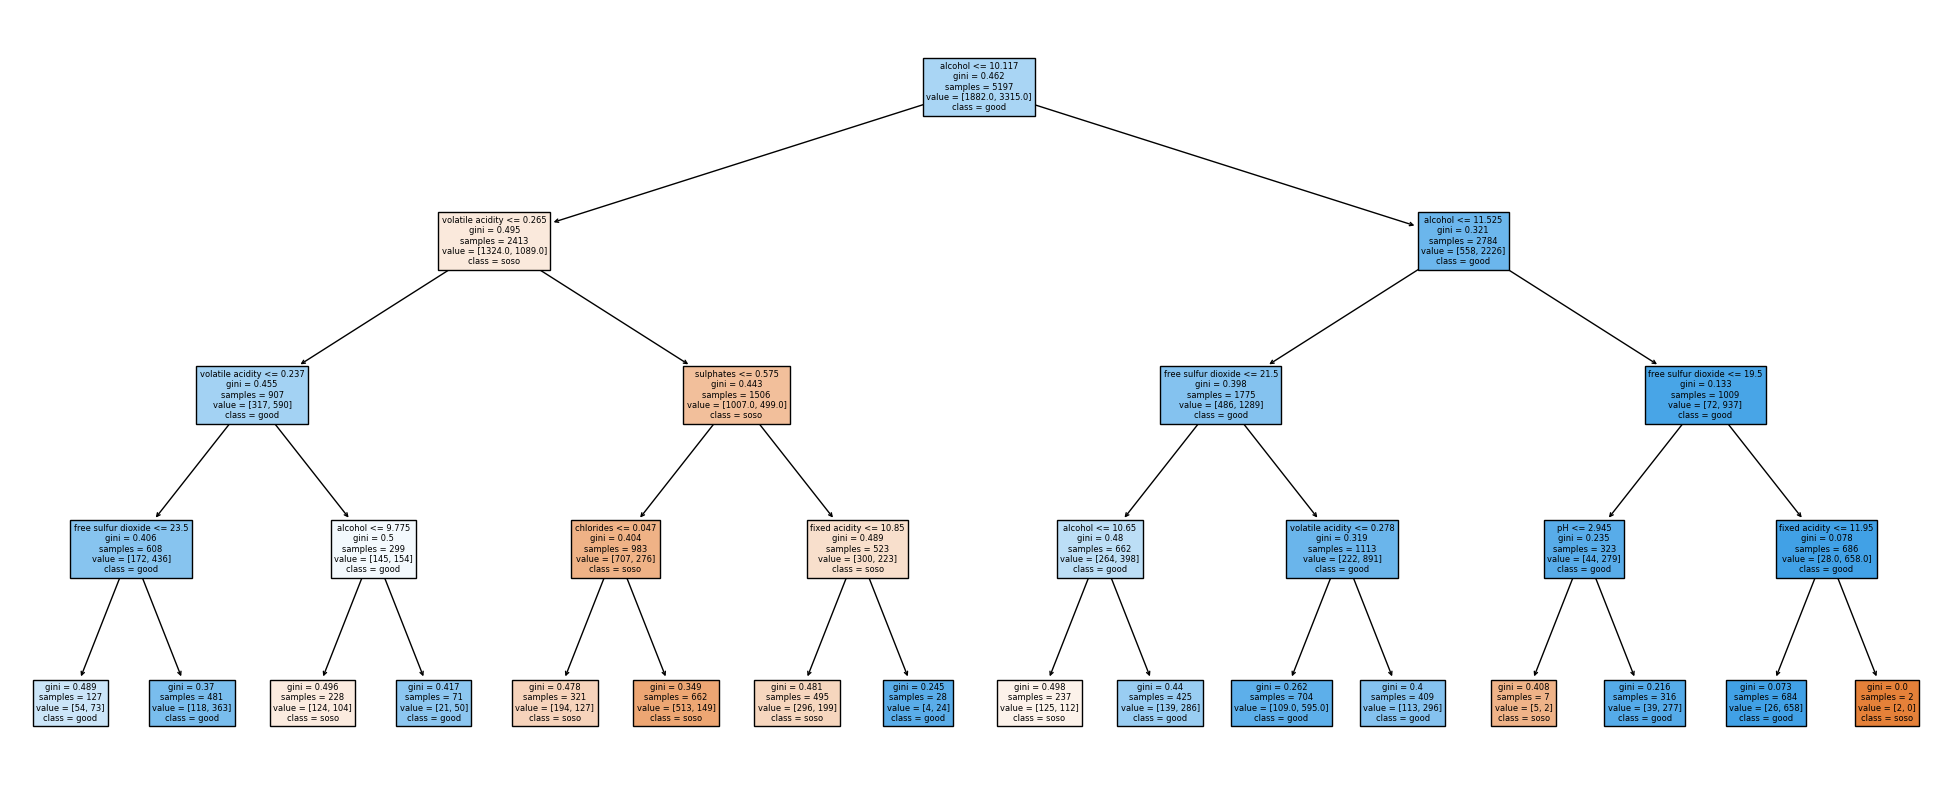

In [55]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(wine_tree, feature_names=x_train.columns, class_names =['soso', 'good'], filled=True)